In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import dateutil as parser

In [2]:
data = pd.read_csv("datasets/appdata10.csv")

In [3]:
data.head()

,user,first_open,dayofweek,hour,age,screen_list,numscreens,minigame,used_premium_feature,enrolled,enrolled_date,liked
0,235136,2012-12-27 02:14:51.273,3,02:00:00,23,"idscreen,joinscreen,Cycle,product_review,ScanP...",15,0,0,0,NaN,0
1,333588,2012-12-02 01:16:00.905,6,01:00:00,24,"joinscreen,product_review,product_review2,Scan...",13,0,0,0,NaN,0
2,254414,2013-03-19 19:19:09.157,1,19:00:00,23,"Splash,Cycle,Loan",3,0,1,0,NaN,1
3,234192,2013-07-05 16:08:46.354,4,16:00:00,28,"product_review,Home,product_review,Loan3,Finan...",40,0,0,1,2013-07-05 16:11:49.513,0
4,51549,2013-02-26 18:50:48.661,1,18:00:00,31,"idscreen,joinscreen,Cycle,Credit3Container,Sca...",32,0,0,1,2013-02-26 18:56:37.841,1


In [4]:
data.describe()

,user,dayofweek,age,numscreens,minigame,used_premium_feature,enrolled,liked
count,50000.000000,50000.000000,50000.00000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000
mean,186889.729900,3.029860,31.72436,21.095900,0.107820,0.172020,0.621480,0.165000
std,107768.520361,2.031997,10.80331,15.728812,0.310156,0.377402,0.485023,0.371184
min,13.000000,0.000000,16.00000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,93526.750000,1.000000,24.00000,10.000000,0.000000,0.000000,0.000000,0.000000
50%,187193.500000,3.000000,29.00000,18.000000,0.000000,0.000000,1.000000,0.000000
75%,279984.250000,5.000000,37.00000,28.000000,0.000000,0.000000,1.000000,0.000000
max,373662.000000,6.000000,101.00000,325.000000,1.000000,1.000000,1.000000,1.000000


In [5]:
data["hour"] = data.hour.str.slice(1,3)

data["hour"] = pd.to_numeric(data["hour"])

In [6]:
data.describe()

,user,dayofweek,hour,age,numscreens,minigame,used_premium_feature,enrolled,liked
count,50000.000000,50000.000000,50000.000000,50000.00000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000
mean,186889.729900,3.029860,12.557220,31.72436,21.095900,0.107820,0.172020,0.621480,0.165000
std,107768.520361,2.031997,7.438072,10.80331,15.728812,0.310156,0.377402,0.485023,0.371184
min,13.000000,0.000000,0.000000,16.00000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,93526.750000,1.000000,5.000000,24.00000,10.000000,0.000000,0.000000,0.000000,0.000000
50%,187193.500000,3.000000,14.000000,29.00000,18.000000,0.000000,0.000000,1.000000,0.000000
75%,279984.250000,5.000000,19.000000,37.00000,28.000000,0.000000,0.000000,1.000000,0.000000
max,373662.000000,6.000000,23.000000,101.00000,325.000000,1.000000,1.000000,1.000000,1.000000


In [7]:
data2 = data.copy().drop(columns = ["user", "screen_list", "enrolled_date", "first_open", "enrolled"])

<Figure size 432x288 with 0 Axes>

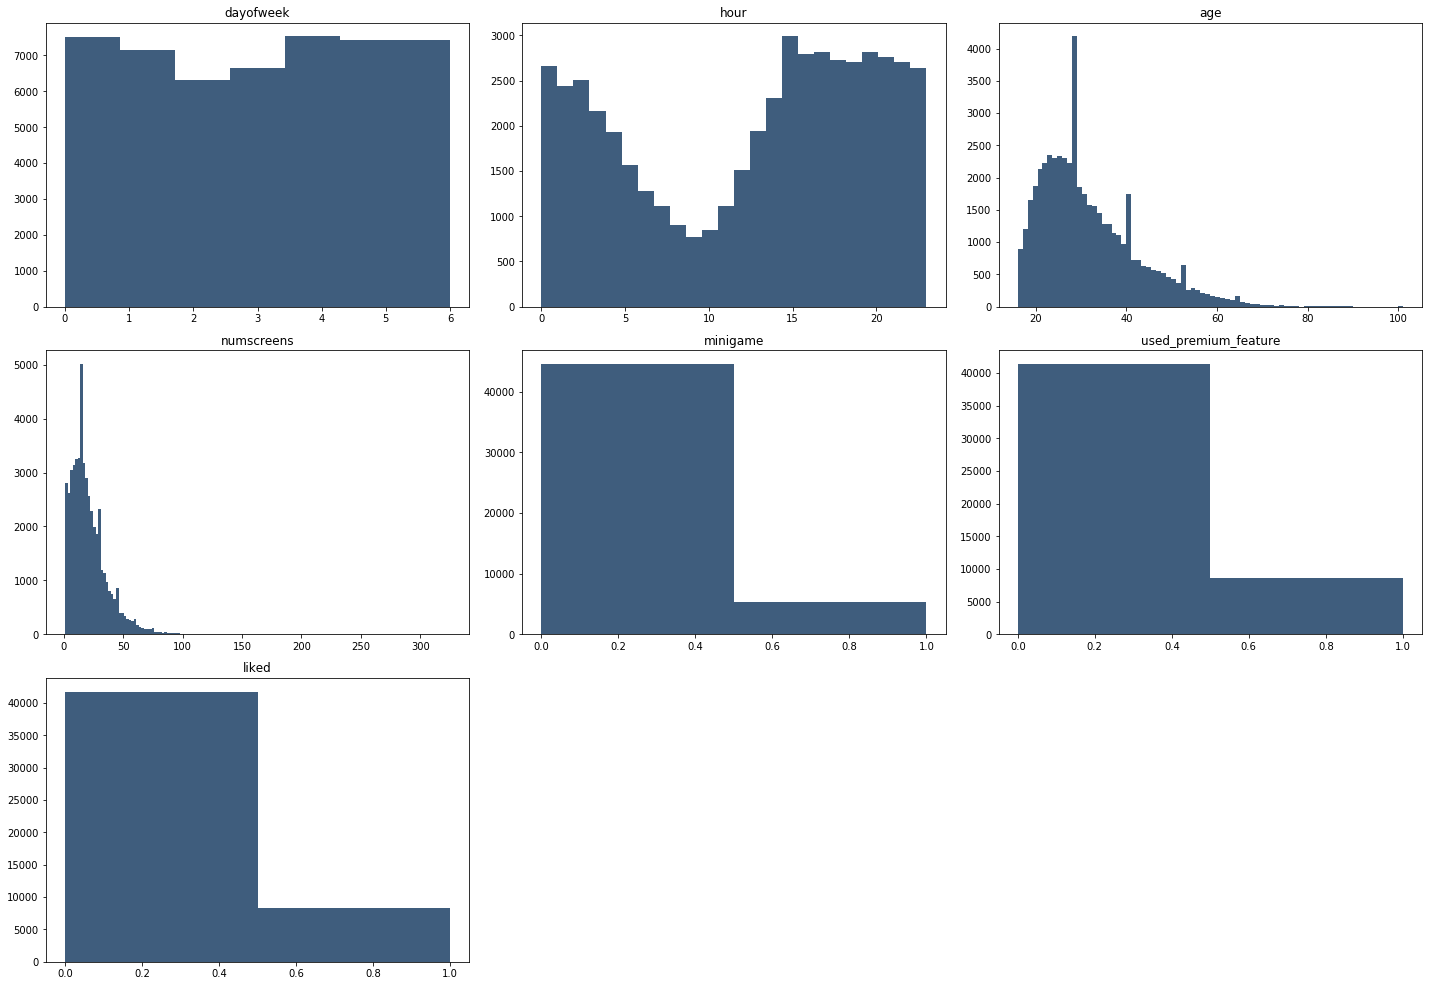

In [8]:
plt.suptitle('Histograms of Numerical Columns', fontsize=20)
plt.figure(figsize=(20,15))
for i in range(1, data2.shape[1] + 1):
    plt.subplot(3, 3, i)
    f = plt.gca()
    #f.axes.get_yaxis().set_visible(False)
    f.set_title(data2.columns.values[i - 1])

    vals = np.size(data2.iloc[:, i - 1].unique())
    
    plt.hist(data2.iloc[:, i - 1], bins=vals, color='#3F5D7D')
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.savefig('data_hist.jpg')
        

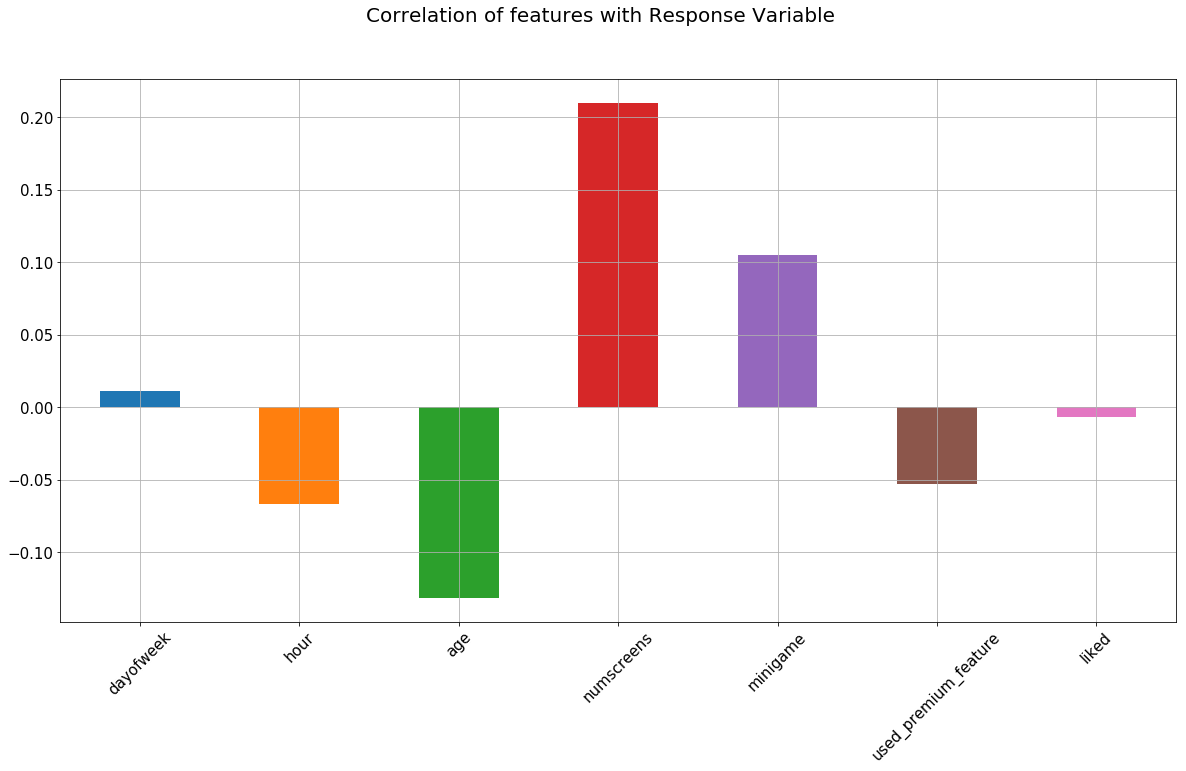

In [22]:
plt.suptitle('Correlation of features with Response Variable', fontsize=20)
data2.corrwith(data.enrolled).plot.bar(figsize=(20,10), fontsize=15, rot=45, grid = True)
plt.show()

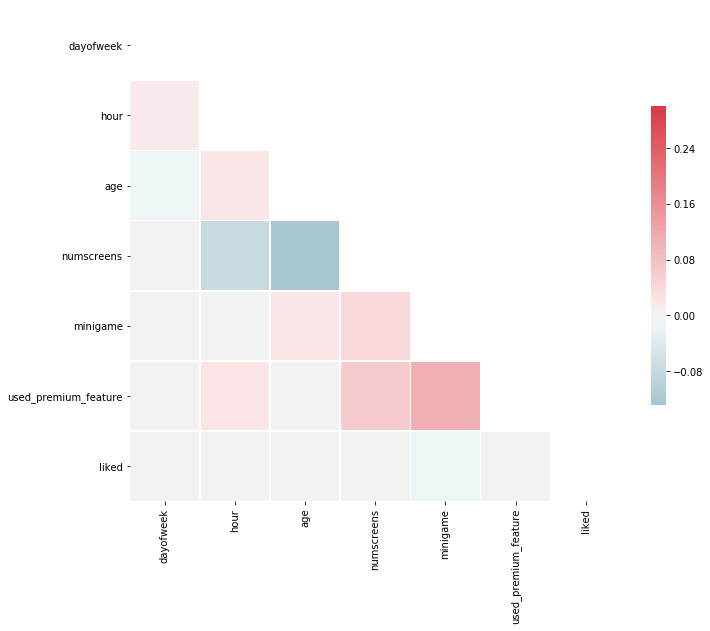

In [9]:
cmap = sns.diverging_palette(220, 10, as_cmap = True)
plt.figure(figsize=(11,11))

mask = np.zeros_like(data2.corr(), dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

sns.heatmap(data2.corr(), cmap=cmap, vmax=0.3, cbar_kws={"shrink":0.5}, linewidths=0.5, center=0, square=True, mask=mask)

In [10]:
data.dtypes

user                     int64
first_open              object
dayofweek                int64
hour                     int64
age                      int64
screen_list             object
numscreens               int64
minigame                 int64
used_premium_feature     int64
enrolled                 int64
enrolled_date           object
liked                    int64
dtype: object

In [11]:
from dateutil import parser
data["first_open"] = [parser.parse(row_data) for row_data in data["first_open"]]
data["enrolled_date"] = [parser.parse(row_data) if isinstance(row_data, str) else row_data for row_data in data["enrolled_date"]]

In [12]:
data.dtypes

user                             int64
first_open              datetime64[ns]
dayofweek                        int64
hour                             int64
age                              int64
screen_list                     object
numscreens                       int64
minigame                         int64
used_premium_feature             int64
enrolled                         int64
enrolled_date           datetime64[ns]
liked                            int64
dtype: object

In [13]:
data["difference"] = (data.enrolled_date - data.first_open).astype("timedelta64[h]")

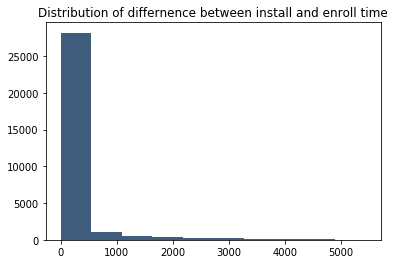

In [14]:
plt.hist(data["difference"].dropna(), color="#3F5D7D")
plt.title("Distribution of differnence between install and enroll time")
plt.show()

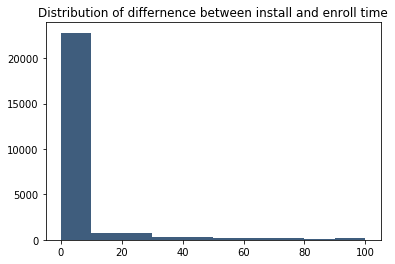

In [15]:
plt.hist(data["difference"].dropna(), color="#3F5D7D", range=[0,100])
plt.title("Distribution of differnence between install and enroll time")
plt.show()


As we can see majority of the users enrolled during the first 30 hours of installing the app. Thus we set a upper limit of 2 days or 48 hours, and everyone who enrolled after 48 hours is set as 0 in enrolled column

In [16]:
data.loc[data.difference > 48, "enrolled"] = 0

In [17]:
#Drop unncessary columns
data = data.drop(columns = ["difference", "enrolled_date", "first_open"])

In [20]:
top_screens = pd.read_csv("datasets/top_screens.csv").top_screens.values

In [21]:
top_screens

array(['Loan2', 'location', 'Institutions', 'Credit3Container',
       'VerifyPhone', 'BankVerification', 'VerifyDateOfBirth',
       'ProfilePage', 'VerifyCountry', 'Cycle', 'idscreen',
       'Credit3Dashboard', 'Loan3', 'CC1Category', 'Splash', 'Loan',
       'CC1', 'RewardsContainer', 'Credit3', 'Credit1', 'EditProfile',
       'Credit2', 'Finances', 'CC3', 'Saving9', 'Saving1', 'Alerts',
       'Saving8', 'Saving10', 'Leaderboard', 'Saving4', 'VerifyMobile',
       'VerifyHousing', 'RewardDetail', 'VerifyHousingAmount',
       'ProfileMaritalStatus', 'ProfileChildren ', 'ProfileEducation',
       'Saving7', 'ProfileEducationMajor', 'Rewards', 'AccountView',
       'VerifyAnnualIncome', 'VerifyIncomeType', 'Saving2', 'Saving6',
       'Saving2Amount', 'Saving5', 'ProfileJobTitle', 'Login',
       'ProfileEmploymentLength', 'WebView', 'SecurityModal', 'Loan4',
       'ResendToken', 'TransactionList', 'NetworkFailure', 'ListPicker'],
      dtype=object)

In [22]:
data["screen_list"] = data.screen_list.astype(str) + ","

In [23]:
data.head()

,user,dayofweek,hour,age,screen_list,numscreens,minigame,used_premium_feature,enrolled,liked
0,235136,3,2,23,"idscreen,joinscreen,Cycle,product_review,ScanP...",15,0,0,0,0
1,333588,6,1,24,"joinscreen,product_review,product_review2,Scan...",13,0,0,0,0
2,254414,1,19,23,"Splash,Cycle,Loan,,",3,0,1,0,1
3,234192,4,16,28,"product_review,Home,product_review,Loan3,Finan...",40,0,0,1,0
4,51549,1,18,31,"idscreen,joinscreen,Cycle,Credit3Container,Sca...",32,0,0,1,1


In [24]:
for sc in top_screens:
    data[sc] = data.screen_list.str.contains(sc).astype(int)
    data["screen_list"] = data.screen_list.str.replace(sc+",", "")

In [25]:
data["other"] = data.screen_list.str.count(",")

In [26]:
data = data.drop(columns = ["screen_list"])

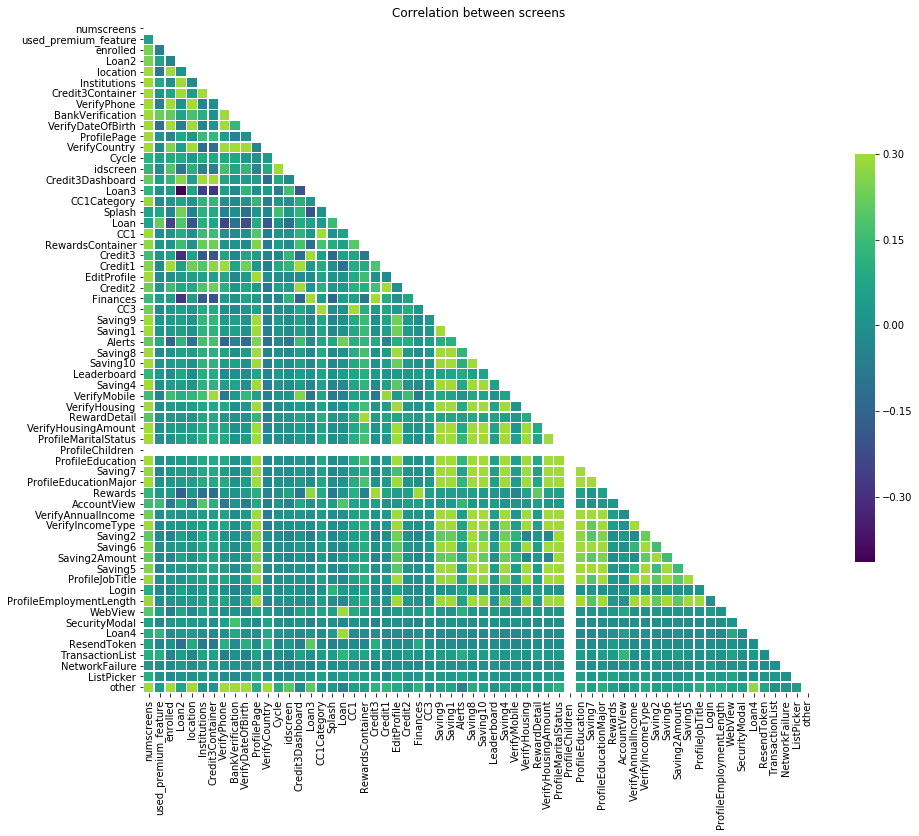

In [29]:
cmap = sns.diverging_palette(220, 10, as_cmap = True)
plt.figure(figsize=(15,15))
plt.title("Correlation between screens")

dataTemp = data.drop(columns = ["user","hour","liked","age","liked","minigame","dayofweek"])

mask = np.zeros_like(dataTemp.corr(), dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

sns.heatmap(dataTemp.corr(), cmap="viridis", vmax=0.3, cbar_kws={"shrink":0.5}, linewidths=0.5, center=0, square=True, mask=mask)

As you can see there is high correlation between some kinds of screens, thus we need to group similar screens into "funnels" and then use them

In [12]:
saving_funnel = ["Saving1",
                "Saving2",
                "Saving2Amount",
                "Saving4",
                "Saving5",
                "Saving6",
                "Saving7",
                "Saving8",
                "Saving9",
                "Saving10"]
data["saving_funnel"] = data[saving_funnel].sum(axis=1)
data = data.drop(columns = saving_funnel)

KeyError: "['Saving1' 'Saving2' 'Saving2Amount' 'Saving4' 'Saving5' 'Saving6'\n 'Saving7' 'Saving8' 'Saving9' 'Saving10'] not in index"

In [ ]:
credit_funnel = ["Credit1",
                "Credit2",
                "Credit3",
                "Credit3Container",
                "Credit3Dashboard"]

data["credit_funnel"] = data[credit_funnel].sum(axis=1)
data = data.drop(columns = credit_funnel)

In [ ]:
cc_funnel = ["CC1",
            "CC1Category",
            "CC3"]

data["cc_funnel"] = data[cc_funnel].sum(axis=1)
data = data.drop(columns = cc_funnel)

In [ ]:
loan_funnel = ["Loan",
              "Loan2",
              "Loan3",
              "Loan4"]

data["loan_funnel"] = data[loan_funnel].sum(axis=1)
data = data.drop(columns = loan_funnel)

In [ ]:
data.to_csv("clean_appdata10.csv", index=False)